# Анализ характеристик музыкальных треков

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("music_dataset.csv")
df.head()

,artist,artist_spotify_id,name,spotify_id,duration_ms,explicit,popularity,album_type,album_name,album_spotify_id,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Николай Матвеев,00CpN6PQf3YUY4vfnEguhV,"Концерт No. 34 ""Да воскреснет Бог""",2LMKbv1STyxCLz4C4yY90M,386600,False,2,album,Великий пост - Святая Пасха,60muqwWww929tUgMnQEkXE,...,4.0,0.991,0.1230,0.1850,0.224000,0.3300,-22.852,0.0481,0.0382,85.169
1,Николай Матвеев,00CpN6PQf3YUY4vfnEguhV,Господи сил,67IbCSYPS0PlGo6wuxOilm,418786,False,1,album,Великий пост - Святая Пасха,60muqwWww929tUgMnQEkXE,...,3.0,0.993,0.0721,0.0982,0.979000,0.1010,-32.690,0.0461,0.1760,77.228
2,Николай Матвеев,00CpN6PQf3YUY4vfnEguhV,Разбойника благоразумного,1iymFuEk462JYmTqSIpCft,135000,False,0,album,Антология русской духовной музыки,5ADPhyfTzzZ3csg2Dm6xMS,...,4.0,0.990,0.1280,0.1670,0.008560,0.1000,-21.622,0.0404,0.0369,81.143
3,Николай Матвеев,00CpN6PQf3YUY4vfnEguhV,Крест - хранитель всея вселенныя,6VKiBpnzgMukq9moEHT0yk,186160,False,0,album,Антология русской духовной музыки,5ADPhyfTzzZ3csg2Dm6xMS,...,3.0,0.995,0.1140,0.1380,0.887000,0.0982,-22.366,0.0419,0.0364,89.878
4,Николай Матвеев,00CpN6PQf3YUY4vfnEguhV,"Спаси, Боже, люди Твоя",1cyNhNBRyUpXAdk3RAz2gd,337000,False,0,album,Антология русской духовной музыки,5ADPhyfTzzZ3csg2Dm6xMS,...,3.0,0.991,0.3590,0.2000,0.000425,0.1250,-18.308,0.0473,0.0974,76.558


Таблица состоит из $44473$ строк информации о треках различных исполнителей. 

In [4]:
df.shape

(44473, 24)

В $24$ столбцах представлены различные параметры. Рассмотрим наиболее интересные из них:
* `popularity` – индекс популярности трека на Spotify;
* `duration_ms` – длительность трека в миллисекундах;
* `key` – тональность трека (0 = C, 1 = C♯/D♭, 2 = D и т.д.);
* `mode` – указывает лад (мажор – 1, минор – 0);
* `danceability` – описывает, насколько трек подходит для танцев от 0,0 до 1,0;
* `energy` – мера интенсивности и активности от 0,0 до 1,0;
* `acousticness` – мера достоверности от 0,0 до 1,0 того, является ли трек акустическим;

Удалим неинтересующуие нас столбцы.

In [4]:
df = df.drop(columns=['artist_spotify_id', 'spotify_id', 'explicit', 'album_type', 'album_name', 'album_spotify_id', 'liveness', 'speechiness', 'valence'])

In [106]:
df.describe()

,duration_ms,popularity,album_popularity,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,loudness,tempo
count,4.447300e+04,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000
mean,2.566982e+05,16.815461,20.759450,5.337216,0.540845,3.886830,0.330028,0.533854,0.603336,0.269757,-10.050987,120.296013
std,1.732500e+05,20.724168,21.421303,3.583537,0.498334,0.477818,0.369351,0.197987,0.287633,0.371658,6.664267,29.665771
min,1.905600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-54.376000,0.000000
25%,1.806000e+05,0.000000,2.000000,2.000000,0.000000,4.000000,0.008800,0.392000,0.394000,0.000002,-12.424000,97.987000
50%,2.233200e+05,7.000000,14.000000,5.000000,1.000000,4.000000,0.141000,0.553000,0.660000,0.003740,-7.910500,120.031000
75%,2.876930e+05,30.000000,34.000000,9.000000,1.000000,4.000000,0.674000,0.688000,0.853000,0.684000,-5.515000,138.978000
max,7.198625e+06,95.000000,100.000000,11.000000,1.000000,5.000000,0.996000,0.990000,1.000000,1.000000,4.147000,247.833000


Заменим пустые ячейки на медианные значения для более корректного анализа.

In [5]:
keys = df.select_dtypes(include='number').columns.values
keys = keys[3:]
for i in keys:
    df[i] = df[i].fillna(df[i].median())

Замитим, что среднее значение темпа - $120,3$ достаточно близко к квантилю порядка 0,5. 

Аналогичным образом ситуация обстоит и с тональностью (что особенно интересно): среднее значение - $5,3$ близко к квантилю порядка 0,5 - $5$. Поэтому проверим данные величины на нормальность распределения.

## Проверка на нормальность распределения

### Визуальный анализ (гистограммы)

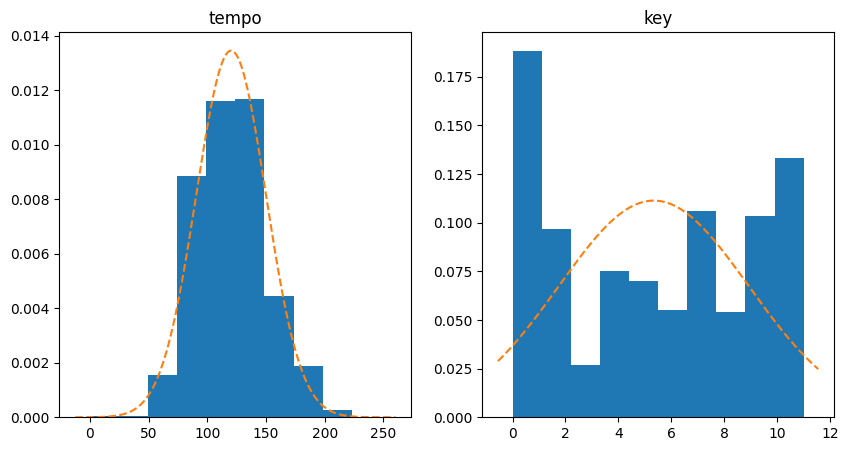

In [108]:
keys = ['tempo', 'key']

fig, axes = plt.subplots(1, len(keys), figsize = (10, 5))

for i, key in enumerate(keys):
    axes[i].hist(df[key], density=True)

    loc = df[key].mean()
    scale = df[key].std()

    x_l, x_r = axes[i].get_xlim()

    x = np.linspace(x_l, x_r, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    axes[i].plot(x, y, linestyle='dashed')
    axes[i].set_title(key)

plt.show()

Из графиков можно увидеть, что распределение тональности далеко от нормального. Значения темпа, в свою очередь, распределены относительно нормально.

### Визуальный анализ (квантили)

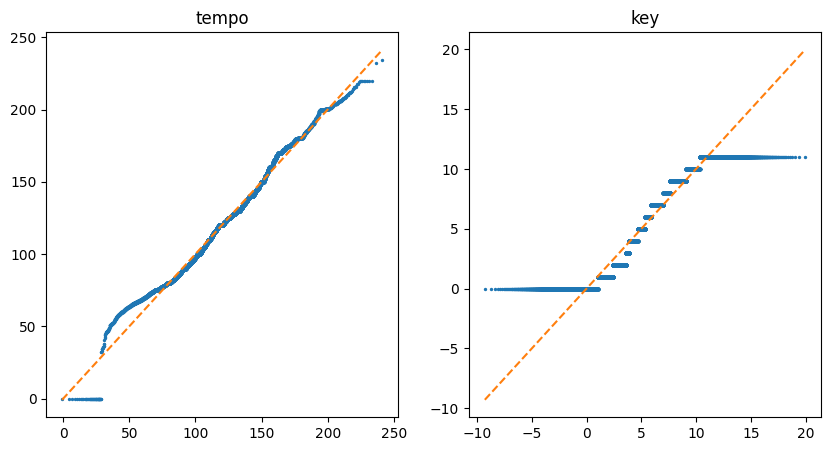

In [89]:
keys = ['tempo', 'key']

fig, axes = plt.subplots(1, len(keys), figsize = (10, 5))

for i, key in enumerate(keys):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.nanquantile(samples, interval)
    axes[i].scatter(x, y, s=2)
    axes[i].plot(x, x, color='C1', linestyle='dashed')
    axes[i].set_title(key)

plt.show()

Как и было замечено ранее, распределение тональностей не является нормальным. А вот темпы распределены относительно нормально.

### Статистические показатели выборок

In [90]:
keys = ['tempo', 'key']

for i, key in enumerate(keys):
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_v = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_v = ((samples >= loc - i*scale) & (samples <= loc + i*scale)).sum() / samples.shape[0]
        print(f'{i} sigma')
        print(f'normal: {true_v}')
        print(f'real: {sample_v}')
    print(' ')

tempo
1 sigma
normal: 0.6826894921370859
real: 0.6624243923279293
2 sigma
normal: 0.9544997361036416
real: 0.9633035774514874
3 sigma
normal: 0.9973002039367398
real: 0.9981786702043937
 
key
1 sigma
normal: 0.6826894921370859
real: 0.5320981269534324
2 sigma
normal: 0.9544997361036416
real: 1.0
3 sigma
normal: 0.9973002039367398
real: 1.0
 


Вероятности попасть в интервалы ($\mu - \sigma$ ; $\mu + \sigma$), ($\mu - 2\sigma$ ; $\mu + 2\sigma$), ($\mu - 3\sigma$ ; $\mu + 3\sigma$) для темпа довольно близки к теоретическим (вероятностям нормального распределения), это свидетельствует о том, что распределение темпов действительно можно признать нормальным.

## Существует ли регрессия между "громкостью" трека и его "энергичностью"?

### Визуализация

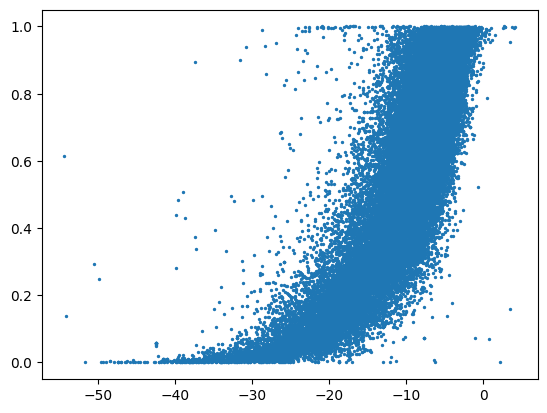

In [65]:
plt.scatter(df['loudness'], df['energy'], s=2)
plt.show()

### Расчет регрессии

In [70]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [72]:
ones = np.ones((44473,1))
x_pot = np.hstack((ones, df['loudness'].values.reshape(44473,1)))

XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['energy'])
z = x_pot.dot(b)
e = df['energy'] - z

R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['energy']))
R

0.6925814047851998

Полученное значение не мало, поэтому зависимость скорее всего существует (что вполне логично) и может быть описана регрессией.

## Различается ли популярность продолжительных и коротких треков?

Многим из вас известна история о том, что песню группы Queen "Богемная рапсодия" не хотели брать на радио из-за ее слишком большой продолжительности. Неужели продолжительность песни может негативно полвиять на ее популярность? Проверим, отличается ли популярность песен, длительность которых выше среднего значения, от треков с меньшей продолжительностью.

In [95]:
def var_analysis(df, df1, df2, key):
    n1 = df1.shape[0]
    n2 = df2.shape[0]
    res1_mean = df1[key].mean()
    res2_mean = df2[key].mean()
    res_mean = df[key].mean()

    ss_b = n1*(res1_mean - res_mean)**2 + n2*(res2_mean - res_mean)**2 #сумма квадратов регрессии
    ss_w = ((df1[key] - res1_mean)**2).sum() + ((df2[key] - res2_mean)**2).sum() #сумма квадратов ошибков

    k = 2
    n = n1 + n2
    k1 = k - 1
    k2 = n - k
    sigma2_b = ss_b / k1
    sigma2_w = ss_w / k2

    F = sigma2_b / sigma2_w

    alpha = 0.05

    t = stats.f.ppf(1 - alpha, k1, k2)

    return F>t

In [96]:
df1 = df[df['duration_ms'] > df['duration_ms'].mean()]
df2 = df[df['duration_ms'] <= df['duration_ms'].mean()]
var_analysis(df, df1, df2, 'popularity')

True

In [99]:
res1_mean = df1['popularity'].mean()
res2_mean = df2['popularity'].mean()

print(f'Long duration: {res1_mean}, less duration: {res2_mean}')

Long duration: 11.66286422006388, less duration: 19.52883427159138


Как можно заметить, длительные песни действительно отличаются по параметру "популярность" и являются менее популярными по сравнению с короткими треками.

## Различается ли популярность актустических и неакустических треков?

Существует предположение о том, что акустические треки никогда не добиваются такой популярности, как треки с полноценным, "объемным" инструменталом. Давайте проверим это предположение.

In [100]:
df1 = df[df['acousticness'] > df['acousticness'].mean()]
df2 = df[df['acousticness'] <= df['acousticness'].mean()]
var_analysis(df, df1, df2, 'popularity')

True

In [102]:
res1_mean = df1['popularity'].mean()
res2_mean = df2['popularity'].mean()

print(f'acoustic: {res1_mean}, non-acpustic: {res2_mean}')

acoustic: 14.835299725896794, non-acpustic: 18.015528511068577


Таким образом, предположение доказано.

## Различаются ли популярность танцевальных и нетанцевальных треков?

Являясь участником кавер-группы, могу подчеркнуть, что танцевальные треки вызывают у публики более бурную реакцию, чем те, под которые танцевать нельзя. Проверим, различается ли их популярность согласно рейтингу Spotify.

In [103]:
df1 = df[df['danceability'] > df['danceability'].mean()]
df2 = df[df['danceability'] <= df['danceability'].mean()]
var_analysis(df, df1, df2, 'popularity')

True

In [104]:
res1_mean = df1['popularity'].mean()
res2_mean = df2['popularity'].mean()

print(f'dance-songs: {res1_mean}, non-dance: {res2_mean}')

dance-songs: 21.364422794272038, non-dance: 11.572265246853824


Действительно, танцевальные треки являются более популярными.

## Различается ли популярность треков, написанных в миноре и в мажоре?

In [109]:
df1 = df[df['mode'] == 0]
df2 = df[df['mode'] == 1]
var_analysis(df, df1, df2, 'popularity')

True

In [110]:
res1_mean = df1['popularity'].mean()
res2_mean = df2['popularity'].mean()

print(f'minor: {res1_mean}, major: {res2_mean}')

minor: 16.440989226248774, major: 17.133372136531825


Интересно, но популярность действительно отличается.

## Какие параметры влияют на популярность трека?

Проанализируем связь между характеристиками музыкального трека и его полпулярностью и попытаемся выяснить, что может сделать нашу песню популярной или наоборот оттолкнуть от нее аудиторию, иными словами, попробуем найти рецепт "идеальной песни".

C:\Users\bychk\AppData\Local\Temp\ipykernel_25304\298647544.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()[['popularity']]


<Axes: >

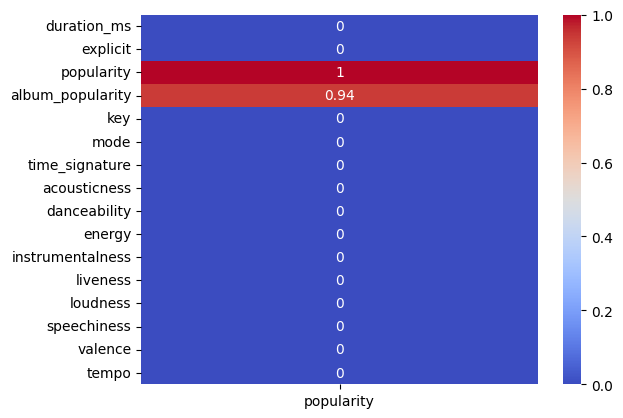

In [56]:
corr_matrix = df.corr()[['popularity']]
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 

Как можно заметить из тепловой карты, довольно высокая корреляция существует между популярностью трека и популярностью альбома, что логично (если трек популярен, а он являестя частью альбома, то и альбом становится более прослушиваемым). Но линеной связи между популярностью трека и остальными характеристиками не наблюдается.

Найдем корреляцию Кенделла.

C:\Users\bychk\AppData\Local\Temp\ipykernel_25304\3796540183.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='kendall')[['popularity']]


<Axes: >

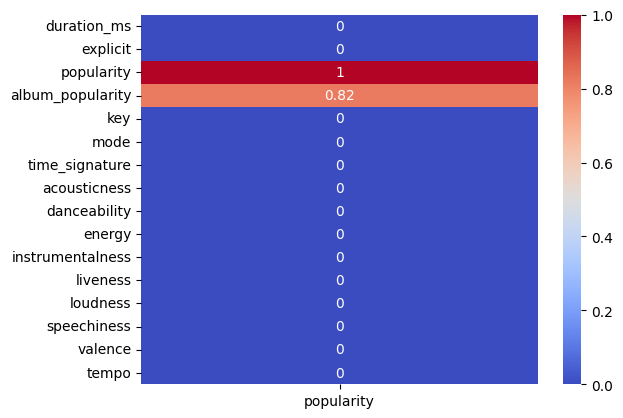

In [57]:
corr_matrix = df.corr(method='kendall')[['popularity']]
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 

К сожалению, корреляция Кендалла не показала никакой связи между харакетристиками трека и популярностью, отыскать рецепт "идельной песни" с помощью таблиц корреляции не удалось.

## Другие интересные замечания

А на последок узнаем, какой же трек является самым популярным по версии Spotify.

In [13]:
print('самый популярный трек: ', df.iloc[df['popularity'].idxmax()]['name'], ', исполнителем которого является:', df.iloc[df['popularity'].idxmax()]['artist'])

самый популярный трек:  For The Night (feat. Lil Baby & DaBaby) , исполнителем которого является: PCP


## Выводы

Проанализировав датасет, можем сделать следующие выводы:
* Значения темпов, в которых написаны треки, распределены нормально.
* Распределение тональностей не является нормальным (все любят до-мажор!)
* Энергичность трека зависит от его громкости.
* Длинные треки менее популярны по сравнению с короткими.
* Танцевальные треки более популярны.
* Популярность мажорных и минорных треков различна.
* Корреляционные таблицы не показывают зависимости между популярностью трека и музыкальными характеристикамию 